In [206]:
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt

In [208]:
plt.style.use('fivethirtyeight')

In [220]:
def Done():
    out = []
    for i in range(1000):
        randval = np.random.randint(1,150)
        tmp = os.popen(f"./lottery.py -l 100:100,100:100 -s {randval} -c").read()
        out.append(tmp)
    return np.array(out)

In [221]:
tmplist = Done()

In [222]:
def search(tl):
    list0 = []
    list1 = []
    res = {}
    for e in np.array(tl):
        e1 = e.split("\n")
        for e2 in e1:
            if e2.startswith("--> JOB 1"):
                time1 = e2.split(" ")
                list1.append(time1[-1])
            if e2.startswith("--> JOB 0"):
                time0 = e2.split(" ")
                list0.append(time0[-1])
                
    res['ZERO'] = np.array(list0)
    res['ONE'] = np.array(list1)
    return res

In [260]:
zero = sorted(search(tmplist)['ZERO'])
one = sorted(search(tmplist)['ONE'])

<IPython.core.display.Javascript object>


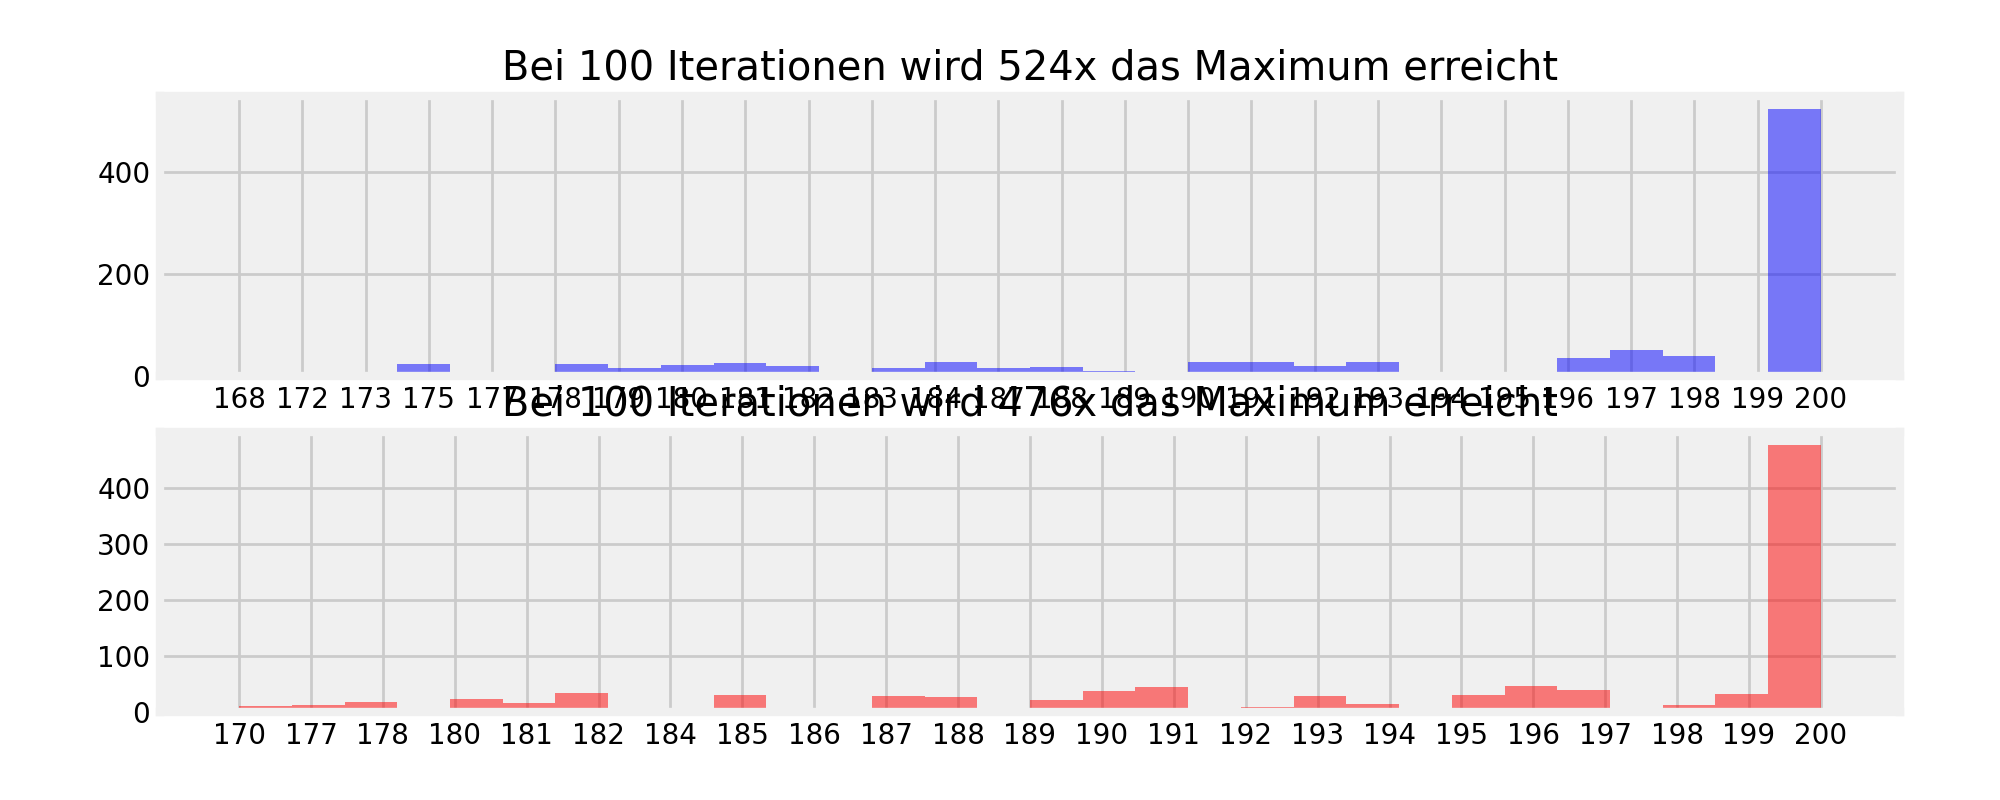

Text(0.5, 1.0, 'Bei 100 Iterationen wird 476x das Maximum erreicht')

In [288]:
%matplotlib notebook
zeromax = zero.count('200')
onemax = one.count('200')
fig,ax = plt.subplots(2,figsize=(10,4))
ax[0].hist(zero,bins=30,color='blue',alpha=0.5)
ax[0].set_title(f"Bei 100 Iterationen wird {zeromax}x das Maximum erreicht")
ax[1].hist(one,bins=30,color='red',alpha=0.5)
ax[1].set_title(f"Bei 100 Iterationen wird {onemax}x das Maximum erreicht")